In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sqlalchemy import create_engine

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16,9)

In [4]:
eng = create_engine("sqlite:///lamost.db4")

In [5]:
pd.read_sql("SELECT * FROM star LIMIT 1", eng).columns

Index(['index', 'obsid', 'designation', 'obsdate', 'lmjd', 'mjd', 'planid',
       'spid', 'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg', 'snrr', 'snri',
       'snrz', 'objtype', 'class', 'subclass', 'z', 'z_err', 'magtype', 'mag1',
       'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'tsource', 'fibertype',
       'tfrom', 'tcomment', 'offsets', 'offset_v', 'ra', 'dec', 'teff',
       'teff_err', 'logg', 'logg_err', 'feh', 'feh_err', 'rv', 'rv_err'],
      dtype='object')

In [6]:
snr = ["snru", "snrg", "snrr", "snri", "snrz"]
sql = f"SELECT {','.join(snr)} FROM star"
dat = pd.read_sql(sql, eng)

In [8]:
dat.dropna(inplace=True)

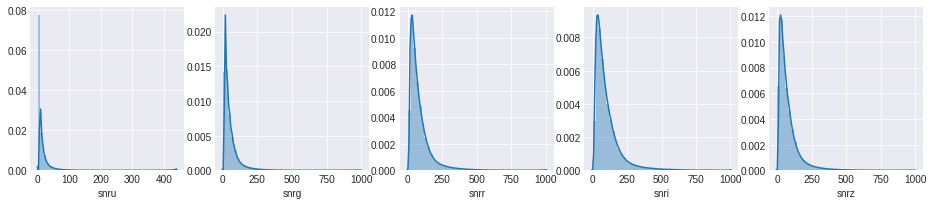

In [11]:
plt.figure(figsize=(16,3))
for i, sig in enumerate(snr):
    plt.subplot(1, 5, 1+i)
    sns.distplot(dat[sig])